In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [1]:
#YCrCb 모델


## 이미지를 흑백으로 만들기
1. 흑백을 만드려면 색상의 합 /3 하면 됨

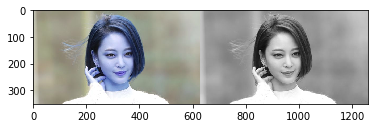

In [7]:
img2 = cv2.imread('./data/Han2.jpeg')
result = img2.copy()

for r in range(h.shape[0]): #모든 픽셀 순환
    for c in range(h.shape[1]):
        col = ( int(img2[r,c,0]) + int(img2[r,c,1]) + int(img2[r,c,2])) / 3 # 8바이트 + 8바이트 + 8바이트
        result[r,c,0] = col #3차원
        result[r,c,1] = col
        result[r,c,2] = col

black_img = cv2.cvtColor(result,cv2.COLOR_BGR2RGB)
plt.imshow(np.hstack([img2, black_img]))  # 오버플로우가 일어나서 큰값에서 작은값으로 바뀜, 8바이트에서 최대값인 256을 벗어나게 됨, 파이썬은 type strong 언어가 아님
plt.show()

## HSV

In [22]:
#피부색 범위
#lower  = np.array([0,48 , 80], dtype = 'uint8')
#upper  = np.array([20,255 , 255], dtype = 'uint8')

In [57]:
print(img3[1,1,0], img3[1,1,1] , img3[1,1,2] , ( int(img3[r,c,0]) + int(img3[r,c,1]) + int(img3[r,c,2])) / 3)

179 198 201 191.66666666666666


In [59]:
img3 = cv2.imread('./data/red.jpg')
result = img3.copy()
hsv = cv2.cvtColor(img3, cv2.COLOR_BGR2HSV) # BGR to HSV
h = hsv[:, : , 0]
s = hsv[:, : , 1]
v = hsv[:, : , 2]



###흑백###
for r in range(h.shape[0]): #모든 픽셀 순환
    for c in range(h.shape[1]):
        col = ( int(img3[r,c,0]) + int(img3[r,c,1]) + int(img3[r,c,2])) / 3 # 8바이트 + 8바이트 + 8바이트
        result[r,c,0] = col #3차원
        result[r,c,1] = col
        result[r,c,2] = col
black_img = cv2.cvtColor(result,cv2.COLOR_BGR2RGB)
# plt.imshow(black_img)
# plt.show()

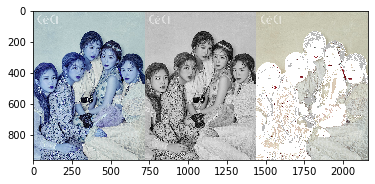

In [63]:
#스킨부분만
for r in range(h.shape[0]):
    for c in range(h.shape[1]):
        bH = h[r,c] >= 0 and h[r,c] <= 20
        bS = s[r,c] >= 48 and s[r,c] <= 255
        bV = v[r,c] >= 80 and v[r,c] <= 255
        if bH and bS and bV:
            result[r,c,0] = 255
            result[r,c,1] = 255
            result[r,c,2] = 255
#         else : #피부색이 아닌경우 흑백으로 처리
#             result[r,c,0] = col 
#             result[r,c,1] = col
#             result[r,c,2] = col

output = cv2.cvtColor(result,cv2.COLOR_BGR2RGB)
# plt.imshow(output)


plt.imshow(np.hstack([img3, black_img , output]))  # 오버플로우가 일어나서 큰값에서 작은값으로 바뀜, 8바이트에서 최대값인 256을 벗어나게 됨, 파이썬은 type strong 언어가 아님
plt.show()

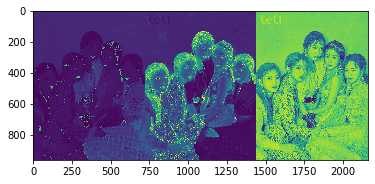

In [29]:
plt.imshow(np.hstack([h , s ,v    ])) # h 색상 , s 채도, v 명도

In [35]:
print(h.shape[1])

720


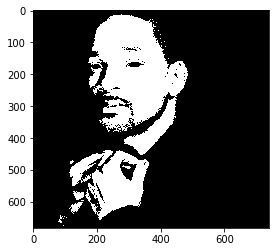

In [58]:
# 사람 피부색 기준 
# 0 <= h <=20 
# 48 <= s <= 255
# 80 <= v <= 255

img3 = cv2.imread('./data/will.jpg')
#plt.imshow(img3)
result = img3.copy()
hsv = cv2.cvtColor(img3, cv2.COLOR_BGR2HSV) # BGR to HSV
h = hsv[:, : , 0]
s = hsv[:, : , 1]
v = hsv[:, : , 2]

for r in range(h.shape[0]):
    for c in range(h.shape[1]):
        bH = h[r,c] >= 0 and h[r,c] <= 20
        bS = s[r,c] >= 48 and s[r,c] <= 255
        bV = v[r,c] >= 80 and v[r,c] <= 255
        if bH and bS and bV: #피부색에 해당되는 라인 일 경우
            result[r,c,:] = [255,255,255]
            #result[r,c,:] = [0,255,0]
            #result[r,c,:] = [0,0,255]
        else : #피부색이 아닌경우 흑백으로 처리
            result[r,c,0] = 0 
            result[r,c,1] = 0
            result[r,c,2] = 0

output = cv2.cvtColor(result,cv2.COLOR_BGR2RGB)
plt.imshow(output)
plt.show()

